# Dependências

In [25]:
#importantndo bibliotecas
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
%matplotlib inline

In [26]:
# Dados
DATA_INTER_PATH = os.path.join('..','data','inter') 
DATA_INTER_TRAIN_NAME = 'train_inter.csv'
IMG_PATH = os.path.abspath(os.path.join('..','img'))

In [27]:
df_train = pd.read_csv(os.path.join(DATA_INTER_PATH, DATA_INTER_TRAIN_NAME))

# Tópicos da Exploração

* Características marcantes dos funcionários que pedem demissão:
* Interação das variáveis  
* Distribuições
* Outliers

In [28]:
df_train.head()

,Department,GEO,Role,Will_Relocate,Trending Perf,Talent_Level,Percent_Remote,EMP_Sat_OnPrem_1,EMP_Sat_OnPrem_2,EMP_Sat_OnPrem_3,EMP_Sat_OnPrem_5,EMP_Sat_Remote_1,EMP_Sat_Remote_2,EMP_Sat_Remote_3,EMP_Sat_Remote_4,EMP_Sat_Remote_5,EMP_Engagement_1,EMP_Engagement_2,EMP_Engagement_3,EMP_Engagement_4,EMP_Engagement_5,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left_Company,promotion_last_5years,sales,salary,LinkedIn_Hits,Emp_Work_Status2,Emp_Work_Status_3,Emp_Work_Status_4,Emp_Work_Status_5,Emp_Identity,Emp_Role,Emp_Position,Emp_Title,Emp_Competitive_1,Emp_Competitive_2,Emp_Competitive_3,Emp_Competitive_4,Emp_Competitive_5,Emp_Collaborative_1,Emp_Collaborative_2,Emp_Collaborative_3,Emp_Collaborative_4,Emp_Collaborative_5,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest)
0,Human Resources,Korea,Level 1,0,3,6,0.8,3.0,3.0,4.0,4.0,3,5,4,4,5,1,2,3,2,1,0.85,6,260,4,0,1,0,sales,low,9,3,3,3,1,2,1,2,1,2,5,1,4,2,5,2,1,5,2,1131,89,8
1,Finance,US,Level 1,1,3,6,0.4,3.0,3.0,4.0,5.0,2,3,2,3,2,5,5,4,4,3,0.46,5,202,4,0,0,0,support,medium,24,4,4,2,1,2,2,1,2,1,5,2,5,3,1,2,3,1,2,3223,75,6
2,Operations,UK,Level 2-4,0,3,6,0.4,3.0,3.0,4.0,5.0,2,3,2,3,2,5,5,4,4,3,0.45,3,225,2,0,0,0,product_mng,low,2,3,5,2,4,2,1,2,2,2,1,2,5,1,5,2,5,5,5,2339,76,7
3,Warehouse,Turkey,Director,1,3,6,0.8,3.0,3.0,4.0,4.0,3,5,4,4,5,5,5,4,4,3,0.74,4,224,5,0,0,0,sales,low,7,1,5,5,2,2,3,3,2,2,1,4,5,3,5,1,4,3,5,5738,79,3
4,Operations,Turkey,Level 1,0,3,6,0.8,3.0,3.0,4.0,4.0,3,5,4,4,5,5,5,4,4,3,0.81,5,140,4,0,0,0,sales,low,10,4,2,1,3,4,3,3,3,4,5,4,1,2,3,1,3,2,3,4528,76,5


In [29]:
#Checando a média de baseada na demissão
abandono=df_train.groupby('left_Company')
abandono.mean()

,Will_Relocate,Trending Perf,Talent_Level,Percent_Remote,EMP_Sat_OnPrem_1,EMP_Sat_OnPrem_2,EMP_Sat_OnPrem_3,EMP_Sat_OnPrem_5,EMP_Sat_Remote_1,EMP_Sat_Remote_2,EMP_Sat_Remote_3,EMP_Sat_Remote_4,EMP_Sat_Remote_5,EMP_Engagement_1,EMP_Engagement_2,EMP_Engagement_3,EMP_Engagement_4,EMP_Engagement_5,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,LinkedIn_Hits,Emp_Work_Status2,Emp_Work_Status_3,Emp_Work_Status_4,Emp_Work_Status_5,Emp_Identity,Emp_Role,Emp_Position,Emp_Title,Emp_Competitive_1,Emp_Competitive_2,Emp_Competitive_3,Emp_Competitive_4,Emp_Competitive_5,Emp_Collaborative_1,Emp_Collaborative_2,Emp_Collaborative_3,Emp_Collaborative_4,Emp_Collaborative_5,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest)
left_Company,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.501592,3.0,6.0,0.618641,2.984850,2.642771,3.637721,3.773521,2.862554,4.453727,3.453727,3.794709,4.112746,5.0,5.0,4.0,4.0,3.0,0.715991,3.783730,198.924470,3.380064,0.175650,0.026238,18.679767,2.998463,3.021078,3.001757,3.021847,2.341201,2.309145,2.161489,2.144912,2.342738,2.993523,2.330772,3.005160,2.996158,2.967724,1.675486,2.982984,3.017785,3.017455,3740.617960,77.641234,6.404765
1,0.490311,3.0,6.0,0.614291,2.941869,2.914879,3.895502,4.336332,2.769204,4.096886,3.096886,3.658824,3.534948,1.0,2.0,3.0,2.0,1.0,0.717304,3.852249,207.592388,3.878201,0.049481,0.005190,18.370242,2.990657,3.022145,3.008304,3.023875,1.509689,1.492734,1.496886,1.498962,1.557785,3.003114,1.534602,2.969896,2.984775,3.018339,1.679239,3.049135,2.977509,3.031488,2356.966436,78.989273,6.406228


In [30]:
#Quem trabalha mais de 8horas pedem demissão
#Pessoas que com base na avaliação acham que não então sendo valorizadas pedem demissão.

<AxesSubplot:>

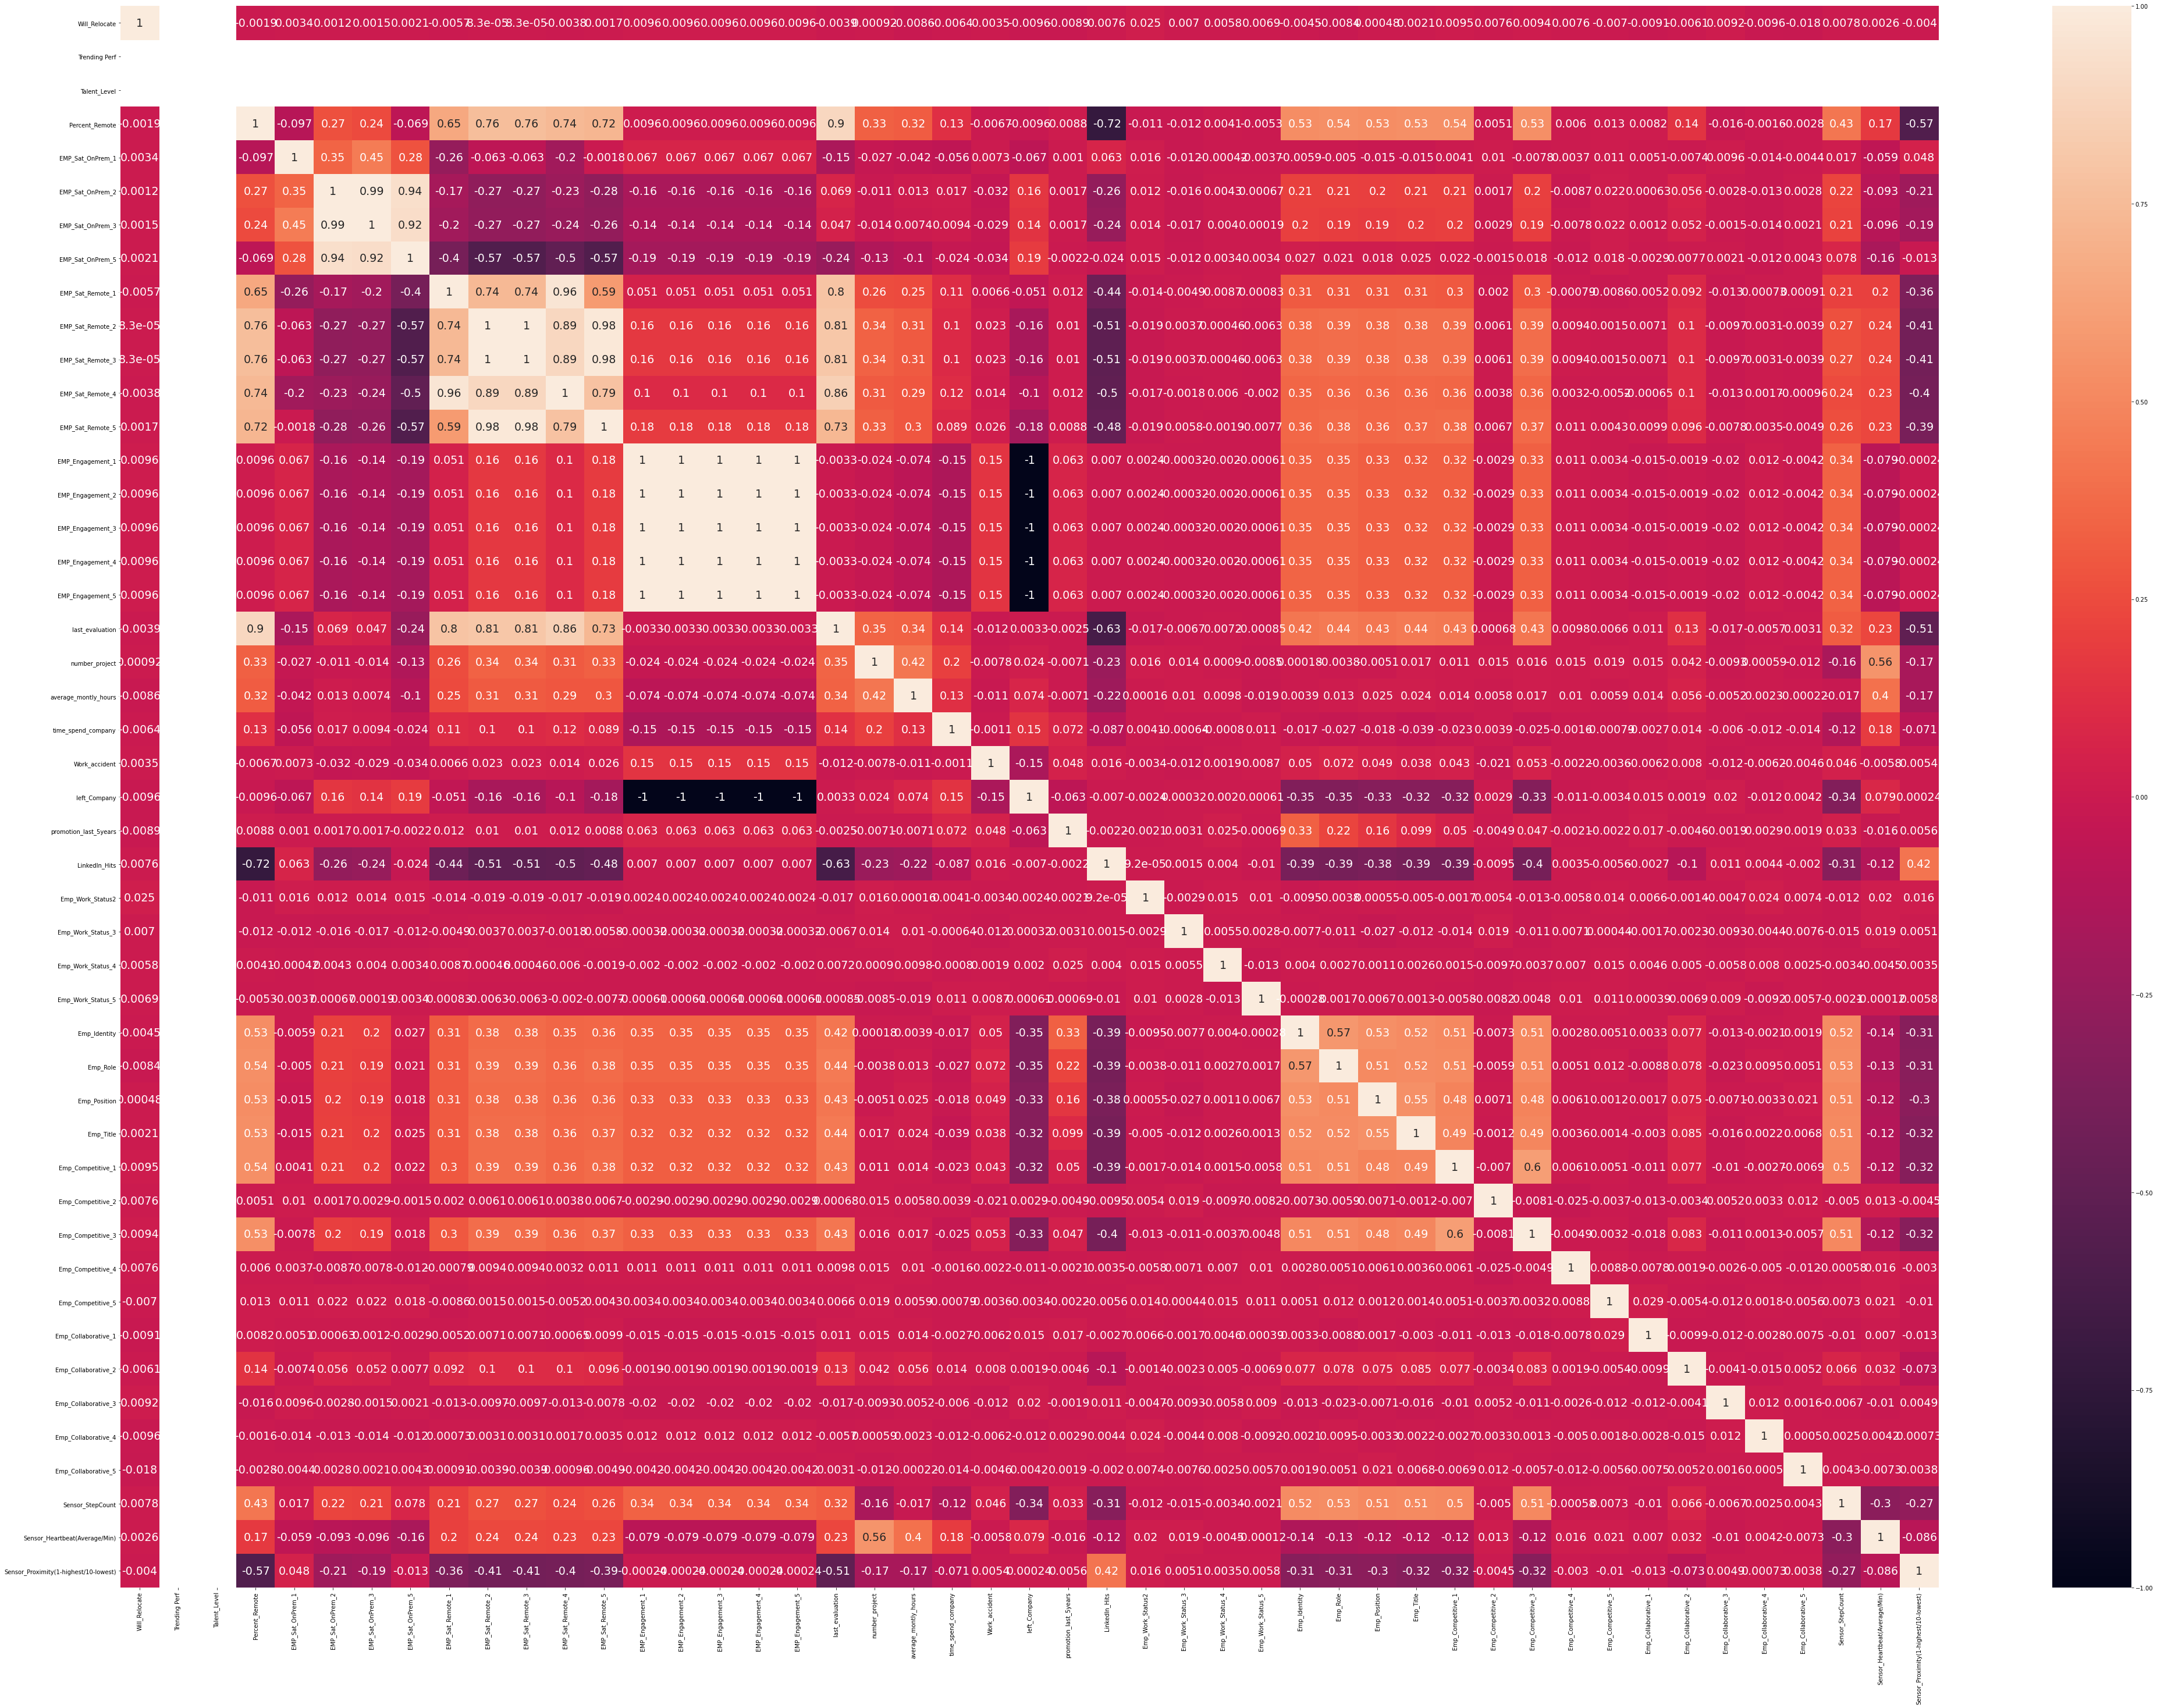

In [31]:
#Plotando correlação

plt.figure(figsize= (70,50))
corr = df_train.corr()
                 
corr=(corr)

sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True,
            annot_kws={"fontsize":19}
            )

## Características Marcantes 

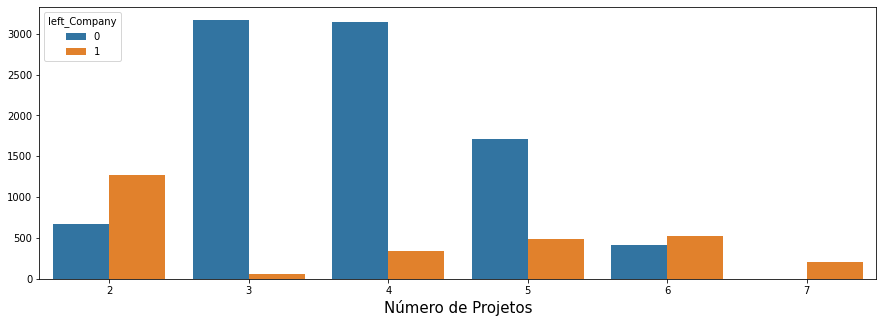

In [32]:
#Verificando a relação entre no número de projetos e saida da empresa.

plt.figure(figsize=(15,5))
fig = sns.countplot(x='number_project',data=df_train,hue='left_Company')
plt.xlabel('Número de Projetos',size=15)
plt.ylabel('')
plt.savefig(os.path.join(IMG_PATH,'relação_saida&quantidade_de_projetos.png'), format='png')
plt.show()

Pode-se notar que há um grupo de risco entre pessoas que possuem 2 projetos e  6 / 7 projetos, subentende-se que pessoas com muitos projetos e com poucos pedem demissão. Considerando uma faixa segura de 3 a 5 projetos por pessoa. 

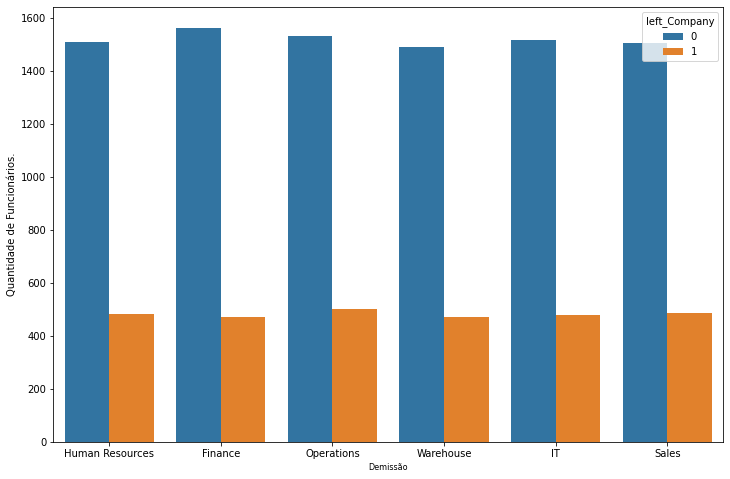

In [33]:
#Departamento vs demissão

plt.figure(figsize=(12,8))
sns.countplot(x='Department',data=df_train,hue='left_Company')
plt.xlabel('Demissão',size=8)
plt.ylabel('Quantidade de Funcionários.')
plt.savefig(os.path.join(IMG_PATH,'DepartamentovsDemissão.png'), format='png')
plt.show()

Aparentemente não há relação entre a profissão e demissão.

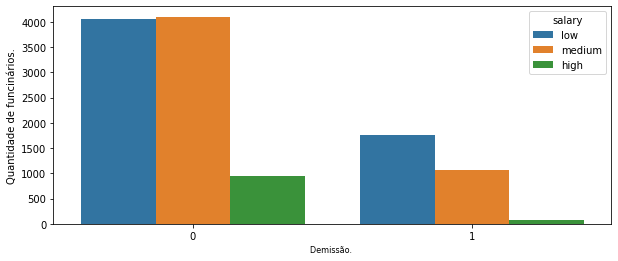

In [34]:
plt.figure(figsize=(10,4))
sns.countplot(x='left_Company',data=df_train,hue='salary')
plt.xlabel('Demissão. ',size=8)
plt.ylabel('Quantidade de funcinários.')
plt.savefig(os.path.join(IMG_PATH,'Relação entre salario e pedido de demissão.png'), format='png')
plt.show()

Geralmente quem possui salário baixo pede demisssão. 

In [35]:
#Média geral de satisfação da feature EMP_Sat_OnPrem
cols_Sat_OnPrem = df_train.filter(regex='EMP_Sat_OnPrem').columns.tolist()
df_train['EMP_Sat_OnPrem_mean'] = round(df_train[cols_Sat_OnPrem].mean(axis=1),1)
# dropando as features 
df_train.drop(cols_Sat_OnPrem, axis=1,inplace=True)

In [36]:
#Média geral de satisfação da feature EMP_Sat_Remote
cols_Sat_Remote = df_train.filter(regex='EMP_Sat_Remote').columns.tolist()
df_train['EMP_Sat_Remote_mean']=round(df_train[cols_Sat_Remote].mean(axis=1),1)
#dropando as features
df_train.drop(cols_Sat_Remote, axis=1,inplace=True)

In [37]:
#Média geral de satisfação da feature EMP_Engagement_
cols_EMP_Engagement = df_train.filter(regex='EMP_Engagement').columns.tolist()
df_train['EMP_Engagement_mean'] = round(df_train[cols_EMP_Engagement].mean(axis=1),1)
# dropando as features
df_train.drop(cols_EMP_Engagement, axis=1,inplace=True)

In [38]:
# Média do status esforço do funcionário.

cols_Emp_Work_Status = df_train.filter(regex='Emp_Work_Status').columns.tolist()
df_train['Emp_Work_Status_mean'] = round(df_train[cols_Emp_Work_Status].mean(axis=1),1)
# dropando as features
df_train.drop(cols_Emp_Work_Status, axis=1,inplace=True)

In [39]:
# Média de como o funcionário de sente
cols_Emp_Competitive = df_train.filter(regex='Emp_Competitive').columns.tolist()
df_train['Emp_Competitive_mean'] = round(df_train[cols_Emp_Competitive].mean(axis=1),1)
# dropando as features
df_train.drop(cols_Emp_Competitive, axis=1,inplace=True)

In [40]:
# Média decolaboração do funcionário
cols_Emp_Collaborative = df_train.filter(regex='Emp_Collaborative').columns.tolist()
df_train['Emp_Collaborative_mean'] = round(df_train[cols_Emp_Collaborative].mean(axis=1),1)
# dropando as features
df_train.drop(cols_Emp_Collaborative, axis=1,inplace=True)

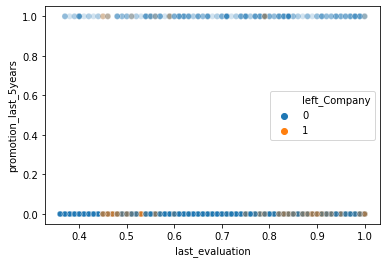

In [70]:
#Gráfico de dispersão 
ax = sns.scatterplot(x="last_evaluation", y='promotion_last_5years', hue='left_Company', data=df_train, alpha=0.2)
plt.show()